In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day) # ten years back from now
end = now # now
ticker = 'AAPL' # ticker for Apple stock
df = yf.download(ticker, start, end, auto_adjust = True)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-13,28.143673,28.166069,27.843556,28.002573,165762000
2015-07-14,28.132475,28.302690,28.004814,28.228781,127072400
2015-07-15,28.403473,28.477382,28.125755,28.157110,134596800
2015-07-16,28.781979,28.795419,28.522178,28.609525,144889600
2015-07-17,29.030584,29.030584,28.737188,28.909644,184658800
...,...,...,...,...,...
2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000
2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900


# Data Exploration and visualization

In [3]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [4]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,103.811427,104.852113,102.655657,103.708971,1.093870e+08
std,69.003725,69.678585,68.235892,68.923577,6.426395e+07
min,20.647459,20.951435,20.448619,20.569752,2.323470e+07
25%,39.253201,39.705588,38.759820,39.247368,6.653175e+07
50%,90.647873,92.011189,90.458313,91.131467,9.425600e+07
75%,164.321747,166.186430,162.961695,164.434872,1.334784e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [5]:
df = df.reset_index()

In [6]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-13,28.143673,28.166069,27.843556,28.002573,165762000
1,2015-07-14,28.132475,28.302690,28.004814,28.228781,127072400
2,2015-07-15,28.403473,28.477382,28.125755,28.157110,134596800
3,2015-07-16,28.781979,28.795419,28.522178,28.609525,144889600
4,2015-07-17,29.030584,29.030584,28.737188,28.909644,184658800
...,...,...,...,...,...,...
2510,2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000
2511,2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900
2512,2025-07-09,211.139999,211.330002,207.220001,209.529999,48749400


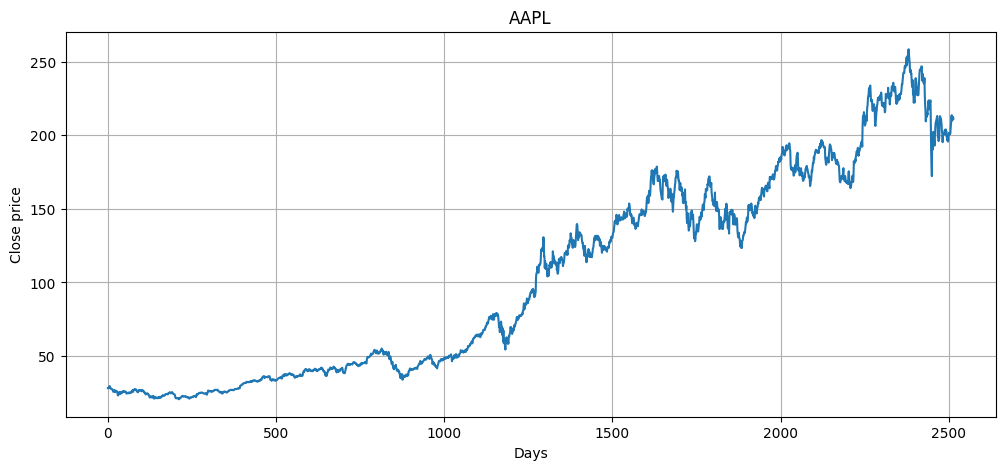

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel("Days");
plt.ylabel("Close price");
plt.grid(True)


# Feature Engineering

## 100 Days Moving Average 

In [8]:

df['MA_100'] = df.Close.rolling(100).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-13,28.143673,28.166069,27.843556,28.002573,165762000,NaN
1,2015-07-14,28.132475,28.302690,28.004814,28.228781,127072400,NaN
2,2015-07-15,28.403473,28.477382,28.125755,28.157110,134596800,NaN
3,2015-07-16,28.781979,28.795419,28.522178,28.609525,144889600,NaN
4,2015-07-17,29.030584,29.030584,28.737188,28.909644,184658800,NaN
...,...,...,...,...,...,...,...
2510,2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000,211.737625
2511,2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900,211.514571
2512,2025-07-09,211.139999,211.330002,207.220001,209.529999,48749400,211.260374


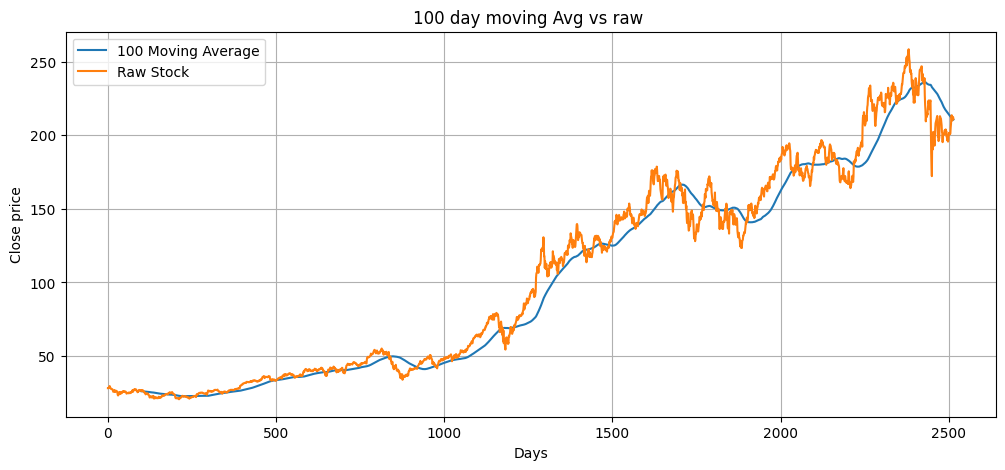

In [9]:
plt.figure(figsize=(12, 5));
plt.plot(df["MA_100"], label="100 Moving Average");
plt.plot(df.Close, label="Raw Stock");
plt.title("100 day moving Avg vs raw ")
plt.legend()
plt.xlabel("Days");
plt.ylabel("Close price");
plt.grid(True)


## 200 Days Moving Average

In [10]:
df["MA_200"] = df.Close.rolling(200).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-13,28.143673,28.166069,27.843556,28.002573,165762000,NaN,NaN
1,2015-07-14,28.132475,28.302690,28.004814,28.228781,127072400,NaN,NaN
2,2015-07-15,28.403473,28.477382,28.125755,28.157110,134596800,NaN,NaN
3,2015-07-16,28.781979,28.795419,28.522178,28.609525,144889600,NaN,NaN
4,2015-07-17,29.030584,29.030584,28.737188,28.909644,184658800,NaN,NaN
...,...,...,...,...,...,...,...,...
2510,2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000,211.737625,222.640072
2511,2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900,211.514571,222.609969
2512,2025-07-09,211.139999,211.330002,207.220001,209.529999,48749400,211.260374,222.566084


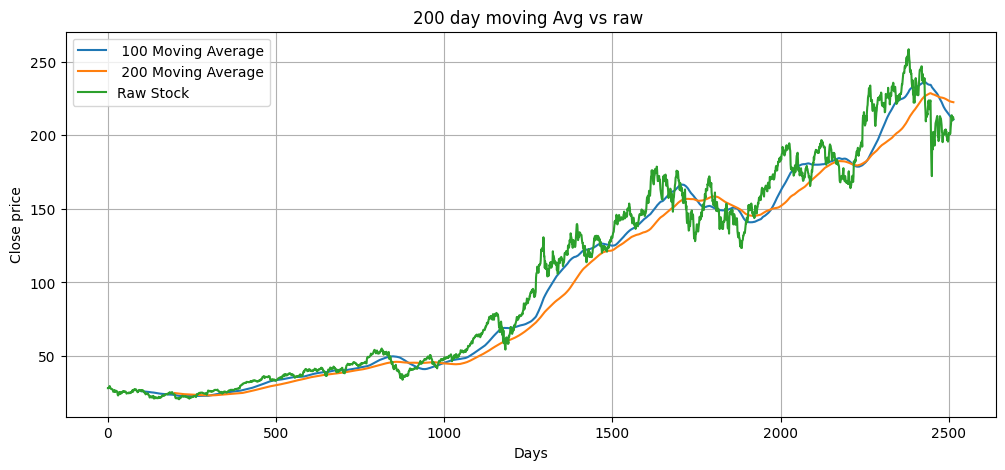

In [11]:
plt.figure(figsize=(12, 5));
plt.plot(df["MA_100"], label=" 100 Moving Average");
plt.plot(df["MA_200"], label=" 200 Moving Average");
plt.plot(df.Close, label="Raw Stock");
plt.legend()
plt.title("200 day moving Avg vs raw ")
plt.xlabel("Days");
plt.ylabel("Close price");
plt.grid(True)

## Caluculating pct change between days

In [12]:
df["Percentage changed"] = df.Close.pct_change()
df[["Close", "Percentage changed"]]

Price,Close,Percentage changed
Ticker,AAPL,
0,28.143673,NaN
1,28.132475,-0.000398
2,28.403473,0.009633
3,28.781979,0.013326
4,29.030584,0.008638
...,...,...
2510,209.949997,-0.016858
2511,210.009995,0.000286
2512,211.139999,0.005381


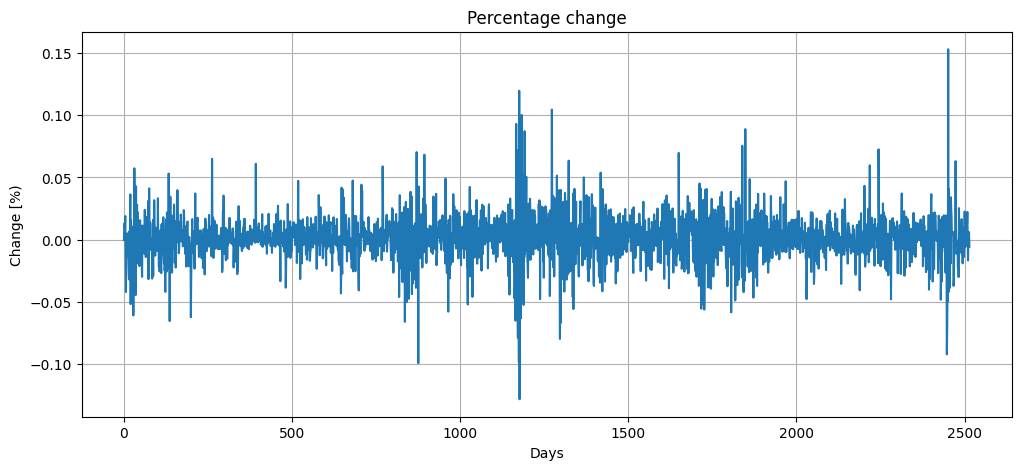

In [13]:
plt.figure(figsize=(12, 5));
plt.plot(df["Percentage changed"])
plt.title("Percentage change")
plt.xlabel("Days");
plt.ylabel("Change [%)");
plt.grid(True)

# 4. Data Preprocessing 

In [14]:
df.shape

(2515, 9)

In [15]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-07-13,28.143673,28.166069,27.843556,28.002573,165762000,NaN,NaN,NaN
1,2015-07-14,28.132475,28.302690,28.004814,28.228781,127072400,NaN,NaN,-0.000398
2,2015-07-15,28.403473,28.477382,28.125755,28.157110,134596800,NaN,NaN,0.009633
3,2015-07-16,28.781979,28.795419,28.522178,28.609525,144889600,NaN,NaN,0.013326
4,2015-07-17,29.030584,29.030584,28.737188,28.909644,184658800,NaN,NaN,0.008638
...,...,...,...,...,...,...,...,...,...
2510,2025-07-07,209.949997,216.229996,208.800003,212.679993,50229000,211.737625,222.640072,-0.016858
2511,2025-07-08,210.009995,211.429993,208.449997,210.100006,42848900,211.514571,222.609969,0.000286
2512,2025-07-09,211.139999,211.330002,207.220001,209.529999,48749400,211.260374,222.566084,0.005381


In [16]:
# Splitting Data into training and testing data 70% and 30%

In [ ]:
# Splitting Data into training and testing data 70% and 30%
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
print(data_training)
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): -1])
print(data_testing)

Ticker        AAPL
0        28.143673
1        28.132475
2        28.403473
3        28.781979
4        29.030584
...            ...
1755    134.561218
1756    136.736298
1757    139.324768
1758    140.663284
1759    144.039124

[1760 rows x 1 columns]
Ticker        AAPL
1760    144.718246
1761    142.582504
1762    143.556885
1763    143.192719
1764    146.125671
...            ...
2509    213.550003
2510    209.949997
2511    210.009995
2512    211.139999
2513    212.410004

[754 rows x 1 columns]


## Scaling down the data between 0 and 1

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04744494],
       [0.04737406],
       [0.04908926],
       ...,
       [0.75113083],
       [0.75960255],
       [0.78096887]])

# 5. Sequence Creation

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [21]:
x_train

array([[[0.04744494],
        [0.04737406],
        [0.04908926],
        ...,
        [0.0377913 ],
        [0.03849202],
        [0.03711922]],

       [[0.04737406],
        [0.04908926],
        [0.05148489],
        ...,
        [0.03849202],
        [0.03711922],
        [0.03560336]],

       [[0.04908926],
        [0.05148489],
        [0.05305836],
        ...,
        [0.03711922],
        [0.03560336],
        [0.03405893]],

       ...,

       [[0.95678014],
        [0.96579935],
        [0.93992343],
        ...,
        [0.73661676],
        [0.72098144],
        [0.73474792]],

       [[0.96579935],
        [0.93992343],
        [0.91827791],
        ...,
        [0.72098144],
        [0.73474792],
        [0.75113083]],

       [[0.93992343],
        [0.91827791],
        [0.91977049],
        ...,
        [0.73474792],
        [0.75113083],
        [0.75960255]]])

In [22]:
y_train

array([0.03560336, 0.03405893, 0.03953598, ..., 0.75113083, 0.75960255,
       0.78096887])

In [23]:
import sys
print(sys.version)

3.11.13 (main, Jun  5 2025, 08:21:08) [Clang 14.0.6 ]


# 6. Model Building

In [24]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0273
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.7603e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.1354e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.0316e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.6029e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.3969e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.3340e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.9726e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.0674e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.0368e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.7068e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.0557e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.0758e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.0066e-04
Epoch 15/50
52/52 ━

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [153]:
data_training.tail(100)


Ticker,AAPL
1660,165.733704
1661,165.969528
1662,169.812164
1663,169.576294
1664,165.969528
...,...
1755,134.561218
1756,136.736298
1757,139.324768
1758,140.663284


In [154]:
data_testing.head()

Ticker,AAPL
1760,144.718246
1761,142.582504
1762,143.556885
1763,143.192719
1764,146.125671


In [155]:
past_100_days = data_training.tail(100)


In [156]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True )
final_df

Ticker,AAPL
0,165.733704
1,165.969528
2,169.812164
3,169.576294
4,165.969528
...,...
849,213.550003
850,209.949997
851,210.009995
852,211.139999


In [157]:
input_data = scaler.fit_transform(final_df)

input_data.shape


(854, 1)

In [158]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [159]:
x_test = np.array(x_test)


In [160]:
y_test = np.array(y_test)
y_test


array([1.57784217e-01, 1.41961022e-01, 1.49179970e-01, 1.46481951e-01,
       1.68211486e-01, 1.80607271e-01, 1.58003079e-01, 1.86659670e-01,
       2.01534839e-01, 2.18378750e-01, 2.09191059e-01, 2.00878705e-01,
       1.91034767e-01, 2.28879049e-01, 2.32962253e-01, 2.70587899e-01,
       2.63296034e-01, 2.52358577e-01, 2.96984082e-01, 2.94650758e-01,
       2.92971420e-01, 2.89466460e-01, 2.89831494e-01, 3.21375687e-01,
       3.15899384e-01, 3.42259166e-01, 3.50218243e-01, 3.49049998e-01,
       3.60148777e-01, 3.57227938e-01, 3.38024137e-01, 3.09181580e-01,
       3.06698806e-01, 3.08889463e-01, 3.27144221e-01, 2.80338798e-01,
       2.63982805e-01, 2.45947135e-01, 2.33606969e-01, 2.39010130e-01,
       2.23311176e-01, 2.13964652e-01, 2.24406504e-01, 2.13453672e-01,
       2.34701959e-01, 2.78951691e-01, 2.08926299e-01, 2.19660496e-01,
       1.98192555e-01, 1.85998223e-01, 2.13599618e-01, 2.31270254e-01,
       2.08049946e-01, 2.00894418e-01, 1.84026880e-01, 1.86509429e-01,
      

# 9. Making predictions

In [161]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [162]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [163]:
y_predicted

array([140.67517 , 142.66159 , 142.90509 , 143.00772 , 142.85985 ,
       143.878   , 145.44478 , 145.25487 , 146.34663 , 148.1147  ,
       150.28804 , 151.08624 , 150.74115 , 149.70444 , 151.1708  ,
       152.78145 , 156.06117 , 157.77759 , 157.68933 , 160.10394 ,
       161.69012 , 162.24797 , 162.08867 , 161.87671 , 163.85329 ,
       164.90576 , 167.10953 , 168.9675  , 169.72789 , 170.671   ,
       170.9079  , 169.51596 , 166.56523 , 164.72437 , 164.15562 ,
       165.3815  , 163.19218 , 160.48984 , 157.8418  , 155.6913  ,
       154.97656 , 153.92372 , 152.75146 , 152.71243 , 152.26488 ,
       153.21626 , 156.76643 , 154.91402 , 153.50336 , 151.45703 ,
       149.4687  , 149.95552 , 151.81963 , 151.83154 , 151.05331 ,
       149.45059 , 148.49843 , 148.49013 , 147.89427 , 144.4544  ,
       140.22922 , 139.08913 , 140.47589 , 142.11707 , 142.84297 ,
       141.00143 , 139.4073  , 137.9142  , 136.76727 , 137.84166 ,
       137.37784 , 138.21574 , 139.57153 , 140.59134 , 140.951

In [164]:
y_test

array([144.71824646, 142.58250427, 143.55688477, 143.19271851,
       146.12567139, 147.79879761, 144.74778748, 148.61572266,
       150.62350464, 152.89701843, 151.65690613, 150.53494263,
       149.20625305, 154.31430054, 154.86543274, 159.94396973,
       158.95974731, 157.48345947, 163.50680542, 163.19186401,
       162.9651947 , 162.49211121, 162.54138184, 166.79907227,
       166.05990601, 169.61782837, 170.69210815, 170.53442383,
       172.03248596, 171.63824463, 169.04620361, 165.15316772,
       164.8180542 , 165.11373901, 167.5776825 , 161.26010132,
       159.05244446, 156.61807251, 154.95245361, 155.68174744,
       153.56277466, 152.30122375, 153.71061707, 152.23225403,
       155.10025024, 161.07287598, 151.62117004, 153.07002258,
       150.17237854, 148.52644348, 152.25195312, 154.63705444,
       151.50288391, 150.5370636 , 148.26036072, 148.59544373,
       149.57119751, 147.67887878, 140.42501831, 136.20675659,
       140.39546204, 143.99281311, 144.28849792, 143.33

In [165]:
# Plotting


Text(0, 0.5, 'Price')

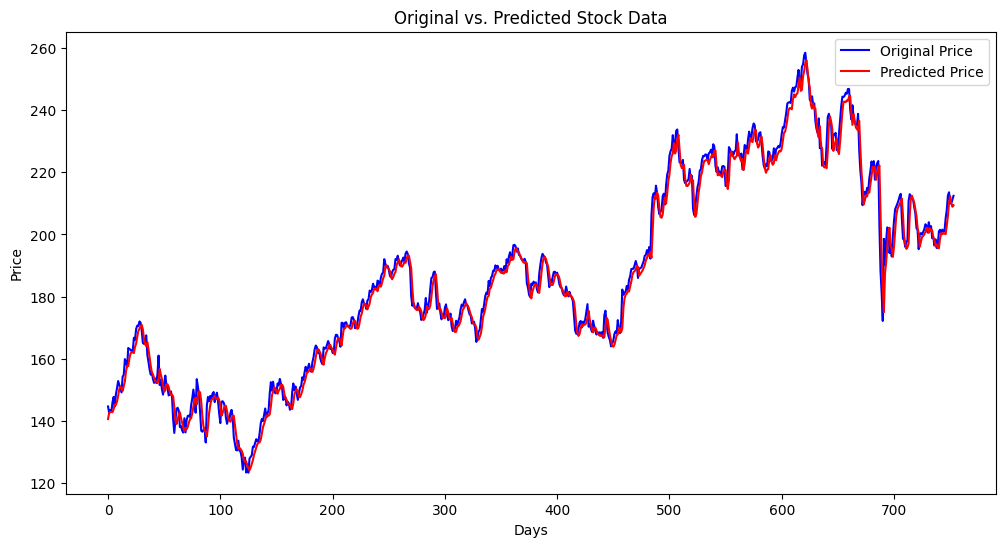

In [168]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.legend()
plt.title('Original vs. Predicted Stock Data')
plt.xlabel('Days')
plt.ylabel('Price')

(160.0, 260.0)

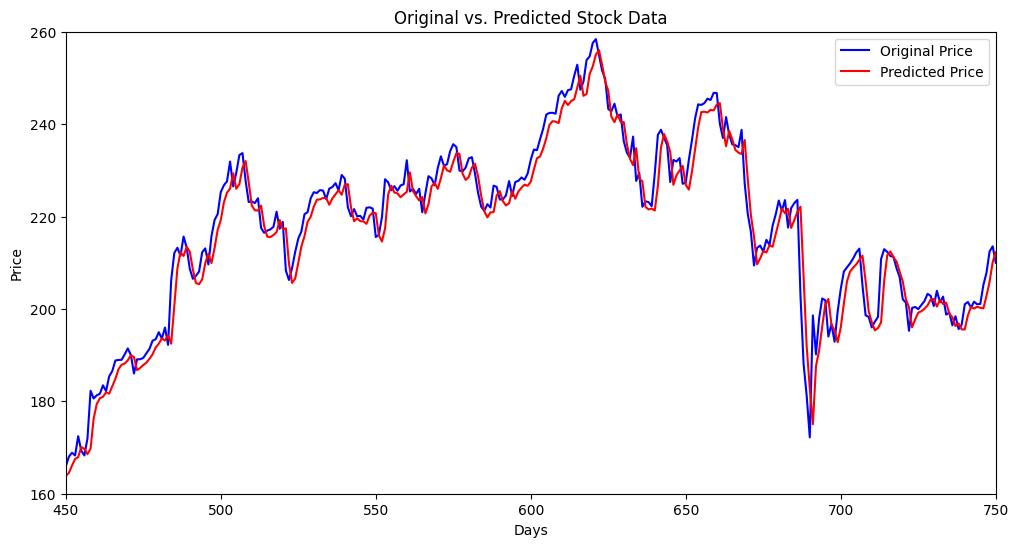

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.legend()
plt.title('Original vs. Predicted Stock Data')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xlim(450, 750)
plt.ylim(160, 260)

# Model Evaluation 

In [179]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 13.356592040741585


In [181]:
# Root Mean Squard Error
rmse = np.sqrt(mse)
print(f' Root Mean Squared Error (RMSE): {rmse}')

 Root Mean Squared Error (RMSE): 3.654667158681018


In [183]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f' R-Squared: {r2}')

 R-Squared: 0.9864693576723228
